In [ ]:
import numpy as np
import scipy.spatial as sp
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

: 

In [7]:
def toruscoord(x: np.array, R: float = 1, r: float =0.5) -> np.array:
    #outer radius R = 1
    #inner radius r = 0.5
    xmin = np.min(x[:,0])
    xmax = np.max(x[:,0]) 
    ymin = np.min(x[:,1])
    ymax = np.max(x[:,1])
    y = []

    for i,j in x:
        phi = 2*math.pi*(i-xmin)/(xmax-xmin)
        theta = 2*math.pi*(j-ymin)/(ymax-ymin)
        a = (R + r*math.cos(theta))*math.cos(phi)
        b = (R + r*math.cos(theta))*math.sin(phi)
        c = r*math.sin(theta)
        y.append((a,b,c))

    return np.array(y)

In [13]:
test_data = pd.read_csv(r'test_data.csv')

In [26]:
shuffled_data = test_data.sample(frac=1)

In [31]:
X = np.array(shuffled_data[:100000]['timestamp'])

week = []
time = []
for i in X:
    week += [int(dt.date(int(i[:4]),int(i[5:7]),int(i[8:10])).strftime("%U"))]
    time += [int(i[11:13])*60*60 + int(i[14:16])*60 + int(i[17:19])]

In [56]:
torus = toruscoord(np.vstack((week,time)).T, R=2000, r=1200)

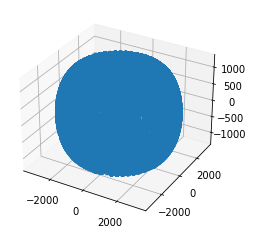

In [62]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(torus[:,0],torus[:,1],torus[:,2])

plt.show(block=False)

In [63]:
print(shuffled_data.shape)

(24876978, 7)


In [ ]:
# import pandas as pd

# df = pd.DataFrame(torus, columns=['x','y','z'])
# df['timestamp'] = X
# df.to_csv('torus_coordinates_1000.csv', index=False)

In [64]:
# import pandas as pd

# df = pd.DataFrame(torus, columns=['x','y','z'])
# df['timestamp'] = X
# df.to_csv('torus_coordinates_1000.csv', index=False)